# Plotting results

#### Jukes Liu. Last modified 10-27-2019.

In [191]:
import numpy as np
# import os
import matplotlib.pyplot as plt
import matplotlib.pylab as pl
import matplotlib.image as mpimg
import cv2
import pandas as pd    
# from time import sleep
# from IPython.display import clear_output
# import scipy.stats
import datetime
# import shutil

csvpaths = '/home/jukes/Documents/Sample_glaciers/'
basepath = '/media/jukes/jukes1/LS8aws/'
massorsize = "mass"
BoxIDs = ['120', '174', '277', '194', '191', '193']
dfs = []

### Load in csv files with terminus position and change rates for the glaciers

In [192]:
df1 = pd.read_csv(csvpaths+'Term_position_timeseries_Box'+BoxIDs[0]+'.csv', sep=',', dtype=str, 
                  header=0, usecols=[1,2,3,4,5,6,7,8,9,10,11])
print(df1.shape)
dfs.append(df1)
df1.head()

(96, 11)


,Scene,BoxID,Image_array,Dat_filename,Trimmed_dat_filename,Scale,datetimes,Scaled_Mass,Order,term_position,changerate
0,LC82330172013102LGN01,120,[[0. 0. 0. ... 0. 0. 0.]\n [0. 0. 0. ... 0. 0....,terminus_000.dat,terminus_trim_000.dat,000,2013-04-12,192274.8242187500,1,585.0,NaN
1,LC82330172013150LGN00,120,[[0. 0. 0. ... 0. 0. 0.]\n [0. 0. 0. ... 0. 0....,terminus_000.dat,terminus_trim_000.dat,000,2013-05-30,366286.2929687500,1,570.0,-0.3125
2,LC82330172013246LGN00,120,[[0. 0. 0. ... 0. 0. 0.]\n [0. 0. 0. ... 0. 0....,terminus_000.dat,terminus_trim_000.dat,000,2013-09-03,190739.0075683594,1,570.0,-0.10416666666666667
3,LC82320172013255LGN00,120,[[0. 0. 0. ... 0. 0. 0.]\n [0. 0. 0. ... 0. 0....,terminus_000.dat,terminus_trim_000.dat,000,2013-09-12,189950.8090820312,1,600.0,0.09803921568627451
4,LC82320182013255LGN00,120,[[0. 0. 0. ... 0. 0. 0.]\n [0. 0. 0. ... 0. 0....,terminus_000.dat,terminus_trim_000.dat,000,2013-09-12,183872.8505859375,1,570.0,-0.09803921568627451


In [193]:
df2 = pd.read_csv(csvpaths+'Term_position_timeseries_Box'+BoxIDs[1]+'.csv', sep=',', dtype=str, 
                  header=0, usecols=[1,2,3,4,5,6,7,8,9,10,11])
print(df2.shape)
dfs.append(df2)
df2.head()

(53, 11)


,Scene,BoxID,Image_array,Dat_filename,Trimmed_dat_filename,Scale,datetimes,Scaled_Mass,Order,term_position,changerate
0,LC82330172013230LGN00,174,[[0. 0. 0. ... 0. 0. 0.]\n [0. 0. 0. ... 0. 0....,terminus_000.dat,terminus_trim_000.dat,000,2013-08-18,324889.1918945312,1,742.5,NaN
1,LC82320172013271LGN00,174,[[0. 0. 0. ... 0. 0. 0.]\n [0. 0. 0. ... 0. 0....,terminus_000.dat,terminus_trim_000.dat,000,2013-09-28,200213.0487060547,1,727.5,-0.36585365853658536
2,LC82330172013310LGN00,174,[[0. 0. 0. ... 0. 0. 0.]\n [0. 0. 0. ... 0. 0....,terminus_000.dat,terminus_trim_000.dat,000,2013-11-06,20392.8789367676,1,652.5,-1.125
3,LC82320172013319LGN00,174,[[0. 0. 0. ... 0. 0. 0.]\n [0. 0. 0. ... 0. 0....,terminus_000.dat,terminus_trim_000.dat,000,2013-11-15,37953.7446594238,1,682.5,-0.6741573033707865
4,LC82330172013342LGN00,174,[[0. 0. 0. ... 0. 0. 0.]\n [0. 0. 0. ... 0. 0....,terminus_001.dat,terminus_trim_001.dat,001,2013-12-08,1452.2151508331,2,862.5,1.0714285714285714


In [194]:
df3 = pd.read_csv(csvpaths+'Term_position_timeseries_Box'+BoxIDs[2]+'.csv', sep=',', dtype=str, 
                  header=0, usecols=[1,2,3,4,5,6,7,8,9,10,11])
print(df3.shape)
dfs.append(df3)
df3.head()

(75, 11)


,Scene,BoxID,Image_array,Dat_filename,Trimmed_dat_filename,Scale,datetimes,Scaled_Mass,Order,term_position,changerate
0,LC82330152013102LGN01,277,[[0. 0. 0. ... 0. 0. 0.]\n [0. 0. 0. ... 0. 0....,terminus_000.dat,terminus_trim_000.dat,000,2013-04-12,196694.0876464844,1,757.5,NaN
1,LC82330152013118LGN01,277,[[0. 0. 0. ... 0. 0. 0.]\n [0. 0. 0. ... 0. 0....,terminus_004.dat,terminus_trim_004.dat,004,2013-04-28,6779.9871826172,1,772.5,0.9375
2,LC80010142013141LGN01,277,[[0. 0. 0. ... 0. 0. 0.]\n [0. 0. 0. ... 0. 0....,terminus_000.dat,terminus_trim_000.dat,000,2013-05-21,580202.1381835938,1,727.5,-0.7692307692307693
3,LC82330152013246LGN00,277,[[0. 0. 0. ... 0. 0. 0.]\n [0. 0. 0. ... 0. 0....,terminus_000.dat,terminus_trim_000.dat,000,2013-09-03,196515.6408691406,1,697.5,-0.4166666666666667
4,LC82320152013255LGN00,277,[[0. 0. 0. ... 0. 0. 0.]\n [0. 0. 0. ... 0. 0....,terminus_000.dat,terminus_trim_000.dat,000,2013-09-12,414488.2060546875,1,712.5,-0.29411764705882354


In [195]:
df4 = pd.read_csv(csvpaths+'Tpos_timeseries_Box'+BoxIDs[3]+'_filtered.csv', sep=',', dtype=str, 
                  header=0)
print(df4.shape)
dfs.append(df4)
df4.head()

(69, 13)


,Unnamed: 0,Scene,BoxID,Image_array,Dat_filename,Trimmed_dat_filename,Scale,datetimes,Metric,Order,term_position,intersections,changerate
0,0,LC80010162013141LGN01,194,[[0. 0. 0. ... 0. 0. 0.]\n [0. 0. 0. ... 0. 0....,terminus_000.dat,terminus_trim_000.dat,000,2013-05-21,119549.0849609375,1,496.6449939342991,"[158.0, 180.0]",NaN
1,1,LC82330162013230LGN00,194,[[0. 0. 0. ... 0. 0. 0.]\n [0. 0. 0. ... 0. 0....,terminus_000.dat,terminus_trim_000.dat,000,2013-08-18,248055.8776855469,1,558.4856757339439,"[162.0, 181.0]",0.6948391213443237
2,2,LC82330162013246LGN00,194,[[0. 0. 0. ... 0. 0. 0.]\n [0. 0. 0. ... 0. 0....,terminus_000.dat,terminus_trim_000.dat,000,2013-09-03,271361.0571289062,1,525.6959672662517,"[160.0, 180.0]",-2.049356779230763
3,3,LC80010162013269LGN00,194,[[0. 0. 0. ... 0. 0. 0.]\n [0. 0. 0. ... 0. 0....,terminus_000.dat,terminus_trim_000.dat,000,2013-09-26,282556.4604492188,1,558.4856757339439,"[162.0, 181.0]",1.4256394985953134
4,4,LC82320162013271LGN00,194,[[0. 0. 0. ... 0. 0. 0.]\n [0. 0. 0. ... 0. 0....,terminus_000.dat,terminus_trim_000.dat,000,2013-09-28,284450.9027099609,1,558.4856757339439,"[162.0, 181.0]",0.0


In [196]:
df5 = pd.read_csv(csvpaths+'Tpos_timeseries_Box'+BoxIDs[4]+'_filtered.csv', sep=',', dtype=str, 
                  header=0)
print(df5.shape)
dfs.append(df5)
df5.head()

(79, 13)


,Unnamed: 0,Scene,BoxID,Image_array,Dat_filename,Trimmed_dat_filename,Scale,datetimes,Metric,Order,term_position,intersections,changerate
0,0,LC80010162013141LGN01,191,[[0. 0. 0. ... 0. 0. 0.]\n [0. 0. 0. ... 0. 0....,terminus_000.dat,terminus_trim_000.dat,000,2013-05-21,212411.8374023438,1,952.7657109699111,"[180.0, 179.0]",NaN
1,1,LC82330162013230LGN00,191,[[0. 0. 0. ... 0. 0. 0.]\n [0. 0. 0. ... 0. 0....,terminus_000.dat,terminus_trim_000.dat,000,2013-08-18,166895.6054687500,1,907.7788827682654,"[177.0, 179.0]",-0.5054699797937722
2,2,LC82330162013246LGN00,191,[[0. 0. 0. ... 0. 0. 0.]\n [0. 0. 0. ... 0. 0....,terminus_000.dat,terminus_trim_000.dat,000,2013-09-03,106639.6739501953,1,937.7699611311934,"[179.0, 179.0]",1.874442397683005
3,3,LC80010162013253LGN00,191,[[0. 0. 0. ... 0. 0. 0.]\n [0. 0. 0. ... 0. 0....,terminus_000.dat,terminus_trim_000.dat,000,2013-09-10,100712.0784912109,1,922.7743494484445,"[178.0, 179.0]",-2.1422302403927103
4,4,LC80010162013269LGN00,191,[[0. 0. 0. ... 0. 0. 0.]\n [0. 0. 0. ... 0. 0....,terminus_000.dat,terminus_trim_000.dat,000,2013-09-26,135289.5898437500,1,907.7788827682654,"[177.0, 179.0]",-0.9372166675111941


In [197]:
df6 = pd.read_csv(csvpaths+'Tpos_timeseries_Box'+BoxIDs[5]+'_filtered.csv', sep=',', dtype=str, 
                  header=0)
print(df6.shape)
dfs.append(df6)
df6.head()

(67, 13)


,Unnamed: 0,Scene,BoxID,Image_array,Dat_filename,Trimmed_dat_filename,Scale,datetimes,Metric,Order,term_position,intersections,changerate
0,0,LC80010162013141LGN01,193,[[0. 0. 0. ... 0. 0. 0.]\n [0. 0. 0. ... 0. 0....,terminus_001.dat,terminus_trim_001.dat,001,2013-05-21,78344.4620361328,1,698.5878613317011,"[116.0, 143.0]",NaN
1,1,LC82330162013230LGN00,193,[[0. 0. 0. ... 0. 0. 0.]\n [0. 0. 0. ... 0. 0....,terminus_000.dat,terminus_trim_000.dat,000,2013-08-18,111283.5766601562,1,494.77267507411926,"[103.0, 147.0]",-2.2900582725570993
2,2,LC82330162013246LGN00,193,[[0. 0. 0. ... 0. 0. 0.]\n [0. 0. 0. ... 0. 0....,terminus_000.dat,terminus_trim_000.dat,000,2013-09-03,91908.5778808594,1,451.2482686947397,"[100.0, 147.0]",-2.720275398711223
3,3,LC80010162013253LGN00,193,[[0. 0. 0. ... 0. 0. 0.]\n [0. 0. 0. ... 0. 0....,terminus_000.dat,terminus_trim_000.dat,000,2013-09-10,72010.2393798828,1,465.72524088780074,"[101.0, 147.0]",2.068138884723006
4,4,LC80010162013269LGN00,193,[[0. 0. 0. ... 0. 0. 0.]\n [0. 0. 0. ... 0. 0....,terminus_000.dat,terminus_trim_000.dat,000,2013-09-26,85332.4395751953,1,480.23431780746364,"[102.0, 147.0]",0.9068173074789314


### Convert all dates to datetime objects and all terminus positions and changerates to floats

In [198]:
#maximum terminus position for the glaciers
max_pos = {'120' : 630.0, '174' : 772.5, '277': 832.5, '194': 650.0, '191': 997.7537271290947 ,'193': 518.5878613317011}

In [199]:
#Turn datetimes from datetime_df into DateTime objects
#grab the datetime strings
for df in dfs:
    datetimes = list(df['datetimes'])
    term_positions = list(df['term_position'])
    changerates = list(df['changerate'])
    BoxID = list(df['BoxID'])[0]
    print(BoxID)
    
    max_position = max_pos[BoxID]
     
    #create list to store the new data
    datetime_objs = []
    tpositions = []
    changes = []

    for date in datetimes:
        date = str(date)
        datetime_obj = datetime.datetime.strptime(date, '%Y-%m-%d')
        datetime_obj = np.datetime64(datetime_obj)
        datetime_objs.append(datetime_obj)
    
    for tpos in term_positions:
        tpos = float(tpos)
        tpos = tpos - max_position
        tpositions.append(tpos)
        
    for crate in changerates:
        crate = float(crate)
        changes.append(crate)

    #add the datetime objects back into the datetime column
    df['datetimes'] = datetime_objs
    df['term_position'] = tpositions
    df['changerate'] = changes

120
174
277
194
191
193


In [200]:
df6

,Unnamed: 0,Scene,BoxID,Image_array,Dat_filename,Trimmed_dat_filename,Scale,datetimes,Metric,Order,term_position,intersections,changerate
0,0,LC80010162013141LGN01,193,[[0. 0. 0. ... 0. 0. 0.]\n [0. 0. 0. ... 0. 0....,terminus_001.dat,terminus_trim_001.dat,001,2013-05-21,78344.4620361328,1,180.000000,"[116.0, 143.0]",NaN
1,1,LC82330162013230LGN00,193,[[0. 0. 0. ... 0. 0. 0.]\n [0. 0. 0. ... 0. 0....,terminus_000.dat,terminus_trim_000.dat,000,2013-08-18,111283.5766601562,1,-23.815186,"[103.0, 147.0]",-2.290058
2,2,LC82330162013246LGN00,193,[[0. 0. 0. ... 0. 0. 0.]\n [0. 0. 0. ... 0. 0....,terminus_000.dat,terminus_trim_000.dat,000,2013-09-03,91908.5778808594,1,-67.339593,"[100.0, 147.0]",-2.720275
3,3,LC80010162013253LGN00,193,[[0. 0. 0. ... 0. 0. 0.]\n [0. 0. 0. ... 0. 0....,terminus_000.dat,terminus_trim_000.dat,000,2013-09-10,72010.2393798828,1,-52.862620,"[101.0, 147.0]",2.068139
4,4,LC80010162013269LGN00,193,[[0. 0. 0. ... 0. 0. 0.]\n [0. 0. 0. ... 0. 0....,terminus_000.dat,terminus_trim_000.dat,000,2013-09-26,85332.4395751953,1,-38.353544,"[102.0, 147.0]",0.906817
5,5,LC82320162013271LGN00,193,[[0. 0. 0. ... 0. 0. 0.]\n [0. 0. 0. ... 0. 0....,terminus_000.dat,terminus_trim_000.dat,000,2013-09-28,71136.8103027344,1,-38.353544,"[102.0, 147.0]",0.000000
6,6,LC82330162013278LGN00,193,[[0. 0. 0. ... 0. 0. 0.]\n [0. 0. 0. ... 0. 0....,terminus_000.dat,terminus_trim_000.dat,000,2013-10-05,48284.6918334961,1,-9.250056,"[104.0, 147.0]",4.157641
7,7,LC82320162013319LGN00,193,[[0. 0. 0. ... 0. 0. 0.]\n [0. 0. 0. ... 0. 0....,terminus_000.dat,terminus_trim_000.dat,000,2013-11-15,138981.0756835938,1,-52.862620,"[101.0, 147.0]",-1.063721
8,8,LC82330162013326LGN00,193,[[0. 0. 0. ... 0. 0. 0.]\n [0. 0. 0. ... 0. 0....,terminus_000.dat,terminus_trim_000.dat,000,2013-11-22,7238.6087036133,1,-38.353544,"[102.0, 147.0]",2.072725
9,9,LC80010162013333LGN00,193,[[0. 0. 0. ... 0. 0. 0.]\n [0. 0. 0. ... 0. 0....,terminus_015.dat,terminus_trim_015.dat,015,2013-11-29,0.0928903966,2,-71.094845,"[100.0, 148.0]",-4.677329


## Plot:

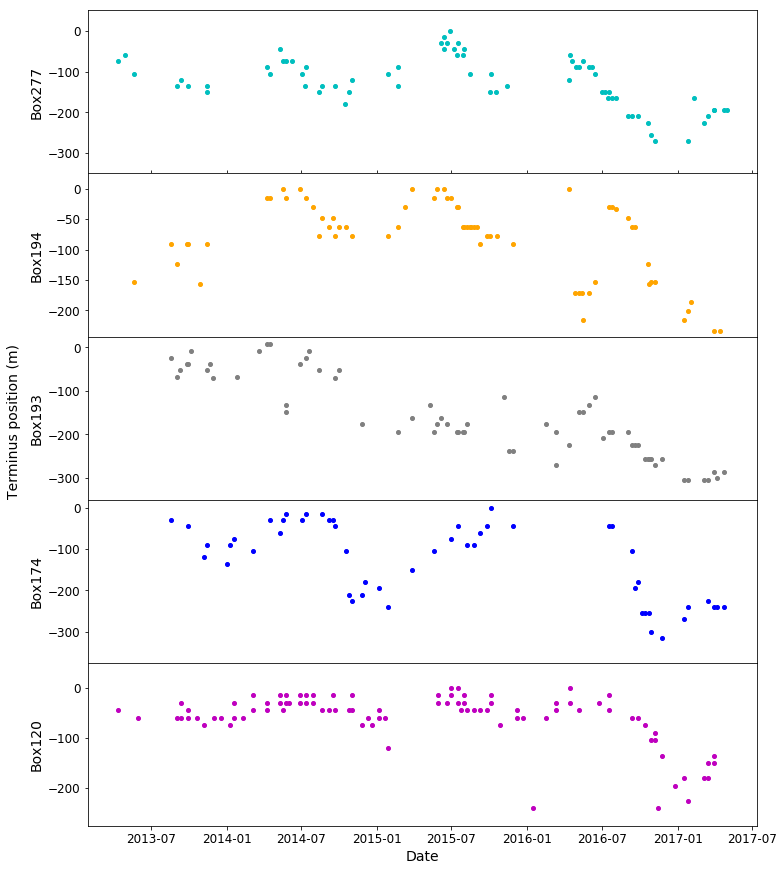

In [216]:
plots = 5
fig, axs = plt.subplots(plots, 1, sharex=True, figsize=(12,15))
# Remove horizontal space between axes
fig.subplots_adjust(hspace=0)

# Plot each graph, and manually set the y tick values
axs[plots-1].plot(df1['datetimes'], df1['term_position'], 'mo', markersize='4')
# axs[2].set_ylim(250, 750)
axs[plots-1].set_ylim(-275, 50)
axs[plots-1].set_ylabel('Box'+BoxIDs[0], fontsize=14, color='k')
axs[plots-1].tick_params(direction='out', colors='k', labelsize=12)

axs[plots-2].plot(df2['datetimes'], df2['term_position'], 'bo', markersize='4')
axs[plots-2].set_ylim(-375, 20)
axs[plots-2].set_ylabel('Box'+BoxIDs[1], fontsize=14, color = 'k')
axs[plots-2].tick_params(direction='out', colors='k', labelsize=12)

axs[plots-3].plot(df6['datetimes'], df6['term_position'], color='gray', marker = 'o',  linewidth=0, markersize='4')
axs[plots-3].set_ylim(-350, 25)
axs[plots-3].set_ylabel('Box'+BoxIDs[5], fontsize=14, color = 'k')
axs[plots-3].tick_params(direction='out', colors='k', labelsize=12)

# axs[plots-2].plot(df2['datetimes'], df2['term_position'], 'bo', markersize='4')
# # axs[plots-2].set_ylim(-375, 20)
# axs[plots-2].set_ylabel('Box'+BoxIDs[1], fontsize=12, color = 'k')
# axs[plots-2].tick_params(direction='out', colors='k')

# Plot each graph, and manually set the y tick values
axs[plots-4].plot(df4['datetimes'], df4['term_position'], color='orange', marker = 'o', linewidth=0, markersize='4')
axs[plots-4].set_ylim(-243, 25)
axs[plots-4].set_ylabel('Box'+BoxIDs[3], fontsize=14, color='k')
axs[plots-4].tick_params(direction='out', colors='k', labelsize=12)

#TOP PLOT
axs[0].plot(df3['datetimes'], df3['term_position'], 'co', markersize='4')
axs[0].set_ylim(-350, 50)
axs[0].set_ylabel('Box'+BoxIDs[2], fontsize=14, color ='k')
axs[0].tick_params(axis = 'y', direction='out', colors='k', labelsize=12)
axs[0].tick_params(axis = 'x', direction='in', colors='k', labelsize=16)

#Set common x label
for ax in axs:
    ax.set_xlabel('Date', fontsize=14)

#Set common y label
fig.text(0.04, 0.5, 'Terminus position (m)', va='center', ha='center', rotation='vertical', fontsize=14)

#Save figure
plt.savefig(csvpaths+"/Figures/Tpos_timeseries_"+str(datetime. datetime. today())[:-16]+".png", dpi=500, bbox_inches='tight')

plt.show()

In [202]:
# df3.sort_values(by='term_position', ascending=False)